In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [2]:
shared = pd.read_csv("../SharedTb_Pf_MM_FS.tsv", sep="\t")

In [3]:
shared["FS/MM_evalue"] = shared["evalue_fs"] / shared["evalue_mm"]

In [4]:
shared["FS/MM_evalue"].replace(np.inf, 1e100, inplace=True)
shared["FS/MM_evalue"].fillna(1, inplace=True)

In [5]:
shared["FS/MM_log_evalue"] =  np.log10(shared["FS/MM_evalue"])

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
shared["FS/MM_log_evalue"].replace(-np.inf, -100, inplace=True)

In [7]:
low, high = shared['FS/MM_log_evalue'].quantile([0.01, 0.99])
filtered_data = shared[(shared['FS/MM_log_evalue'] > low) & (shared['FS/MM_log_evalue'] < high)]


Text(0.5, 0, '$\\it{Log}$ (Foldseek e-value/MMseqs2 e-value)')

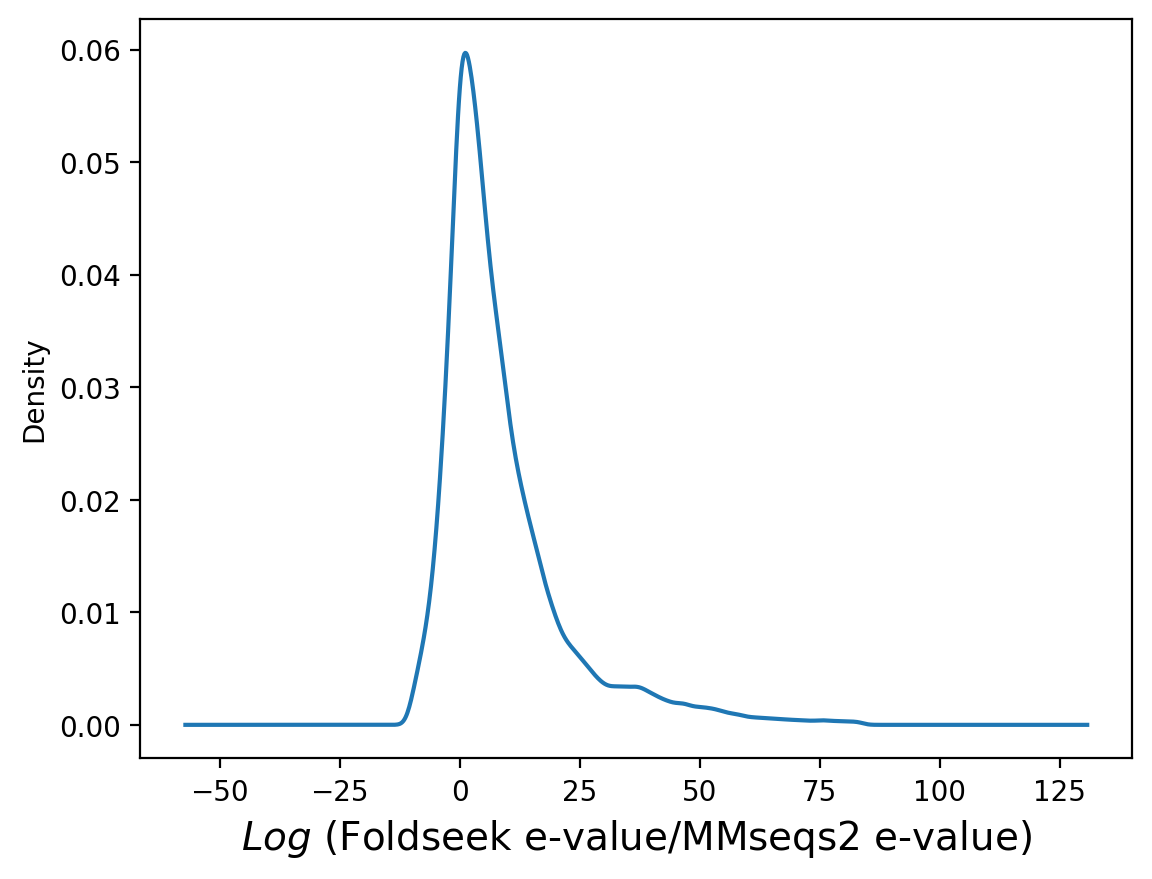

In [8]:
%config InlineBackend.figure_format = 'retina'
filtered_data['FS/MM_log_evalue'].plot.kde()
plt.xlabel('$\it{Log}$ (Foldseek e-value/MMseqs2 e-value)', fontsize=14)

In [9]:
filtered_data['FS/MM_log_evalue'].quantile([0.2171])

0.2171    0.0
Name: FS/MM_log_evalue, dtype: float64